In [2]:
import pickle
import pandas as pd
import ROOT 
import numpy as np

Welcome to JupyROOT 6.24/06


In [3]:
len(output)

1000

In [4]:
output[0]

,d0,z0,phi,theta,qp,time,err_d0,err_z0,err_phi,err_theta,err_qp,err_time,truth_vtxID,pred_label
0,-0.380284,0.096782,0.210407,1.112431,0.273764,1107.508911,0.034043,0.044472,0.001064,0.000931,0.007895,299.79245,0,1
1,-0.862467,0.096751,0.382348,0.201103,-0.107264,890.897949,0.067760,0.162320,0.001257,0.000373,0.003393,299.79248,0,1
2,0.012195,0.096685,0.511967,0.243231,0.044517,682.265198,0.039178,0.084507,0.000744,0.000249,0.001491,299.79248,0,1
3,1.293400,0.096890,0.412932,0.863238,-0.370806,1167.995605,0.031692,0.040798,0.000787,0.001301,0.009918,299.79245,0,1
4,-0.698098,0.096838,-0.421190,0.355347,0.133136,988.288818,0.049506,0.070116,0.000976,0.000570,0.004092,299.79245,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-2.052145,-0.083493,0.311750,0.290069,0.083498,3918.923828,0.046767,0.081285,0.000939,0.000417,0.002627,299.79245,5,0
117,-16.598299,-0.081082,0.104956,0.790115,0.223654,4241.563965,0.051378,0.058711,0.001204,0.001408,0.005995,299.79245,5,0
118,4.761304,-0.082311,0.461286,0.155370,-0.067531,3885.405029,0.033794,0.149497,0.001209,0.000248,0.002123,299.79248,5,0
119,-25.686710,-0.085718,-0.375282,0.839057,-0.362273,3761.727051,0.038892,0.054252,0.001108,0.001819,0.009533,299.79245,5,0


In [5]:
n_vtx_evt_pred = ROOT.TH1F("n_vtx_evt_pred", "n_vtx_evt_pred", 20, 0.5, 20.5)
n_vtx_evt_truth = ROOT.TH1F("n_vtx_evt_truth", "n_vtx_evt_truth", 20, 0.5, 20.5)
n_vtx_evt_diff = ROOT.TH1F("n_vtx_evt_diff", "n_vtx_evt_diff", 20, -10.5, 10.5)


n_trk_evt_pred = ROOT.TH1F("n_trk_evt_pred", "n_trk_evt_pred", 100, 0.5, 100.5)
n_trk_evt_truth = ROOT.TH1F("n_trk_evt_truth", "n_trk_evt_truth", 100, 0.5, 100.5)

In [6]:
n_trk_pred_list = np.zeros((1))
n_trk_truth_list = np.zeros((1))

for i, evt in enumerate(output):
    n_vtx_pred = len(np.unique(evt['pred_label']))
    n_vtx_truth = len(np.unique(evt['truth_vtxID']))
    n_vtx_evt_pred.Fill(n_vtx_pred)
    n_vtx_evt_truth.Fill(n_vtx_truth)
    n_vtx_evt_diff.Fill(n_vtx_pred - n_vtx_truth)
    
    
    n_trk_pred_list = np.concatenate((n_trk_pred_list,  np.bincount(evt['pred_label'])), axis = 0)
    n_trk_truth_list = np.concatenate((n_trk_truth_list,  np.bincount(evt['truth_vtxID'])), axis = 0)

n_trk_pred_list = np.delete(n_trk_pred_list, 0) 
n_trk_truth_list = np.delete(n_trk_truth_list, 0) 

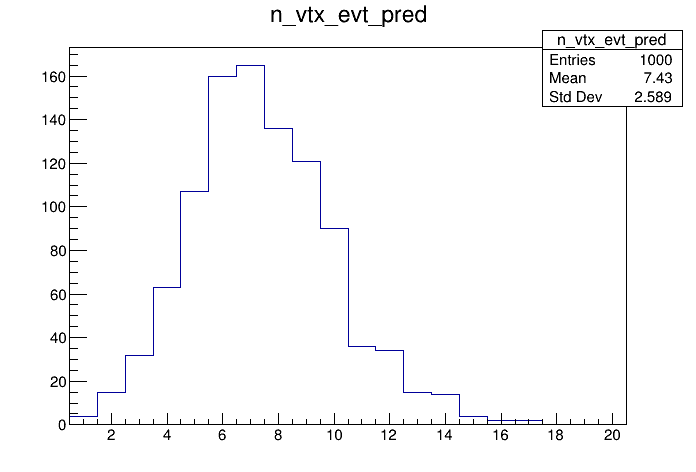

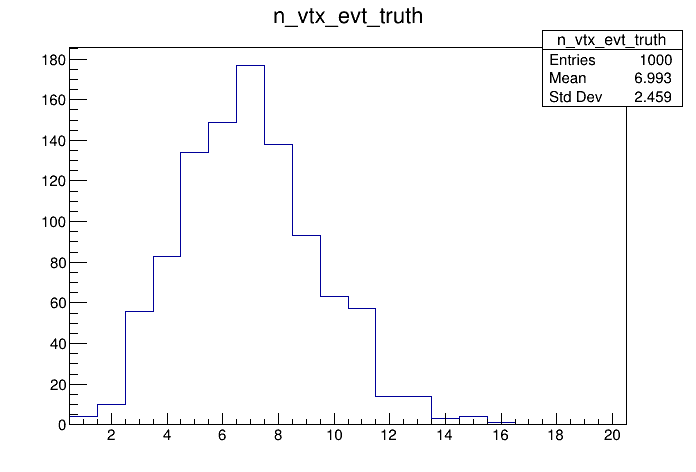

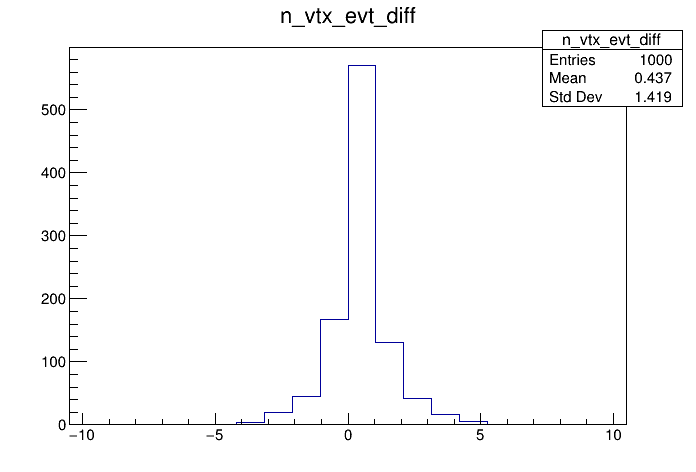

In [7]:
c1 = ROOT.TCanvas()
n_vtx_evt_pred.Draw()
# n_vtx_evt_truth.SetLineColor(2)
# n_vtx_evt_truth.Draw("same")

c1.Draw()

c2 = ROOT.TCanvas()
n_vtx_evt_truth.Draw()
c2.Draw()

c3 = ROOT.TCanvas()
n_vtx_evt_diff.Draw()
c3.Draw()

In [8]:
for i in range(len(n_trk_pred_list)):
    n_trk_evt_pred.Fill(n_trk_pred_list[i])
    
for i in range(len(n_trk_truth_list)):
    n_trk_evt_truth.Fill(n_trk_truth_list[i])
    

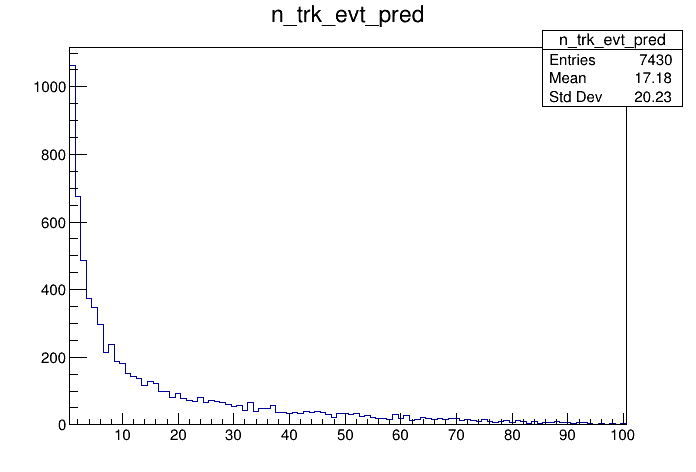

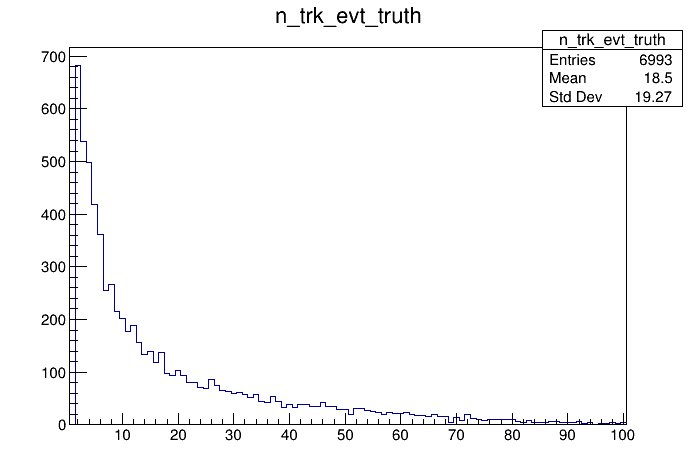

In [9]:
c4 = ROOT.TCanvas()
n_trk_evt_pred.Draw()
c4.Draw()

c5 = ROOT.TCanvas()
n_trk_evt_truth.Draw()
c5.Draw()

In [10]:
pt2_vtx_pred_list = np.zeros((1))
pt2_vtx_truth_list = np.zeros((1))

for i, evt in enumerate(output):
    vtx_pt2_pred = []
    vtx_pt2_truth = []
    for cluster_id_pred in np.unique(evt['pred_label']):
        trk_idx_pred = (evt['pred_label']==cluster_id_pred)
        vtx_pt_pred = np.sum((1./evt[trk_idx_pred]['qp'] * np.cos(evt[trk_idx_pred]['theta']))**2)
        vtx_pt2_pred.append(vtx_pt_pred)

    for cluster_id_truth in np.unique(evt['truth_vtxID']):
        trk_idx_truth = (evt['truth_vtxID']==cluster_id_truth)
        vtx_pt_truth = np.sum((1./evt[trk_idx_truth]['qp'] * np.cos(evt[trk_idx_truth]['theta']))**2)
        vtx_pt2_truth.append(vtx_pt_truth)
        

    pt2_vtx_pred_list = np.concatenate((pt2_vtx_pred_list,  np.array(vtx_pt2_pred)), axis = 0)
    pt2_vtx_truth_list = np.concatenate((pt2_vtx_truth_list,  np.array(vtx_pt2_truth)), axis = 0)
    
pt2_vtx_pred_list = np.delete(pt2_vtx_pred_list, 0) 
pt2_vtx_truth_list = np.delete(pt2_vtx_truth_list, 0) 


In [11]:
hist_pt2_vtx_pred = ROOT.TH1F("hist_pt2_vtx_pred", "hist_pt2_vtx_pred", 100, 0, 5000)
hist_pt2_vtx_truth = ROOT.TH1F("hist_pt2_vtx_truth", "hist_pt2_vtx_truth", 100, 0, 5000)

In [12]:
for pt2_vtx in pt2_vtx_pred_list:
    hist_pt2_vtx_pred.Fill(pt2_vtx)
    
for pt2_vtx in pt2_vtx_truth_list:
    hist_pt2_vtx_truth.Fill(pt2_vtx)

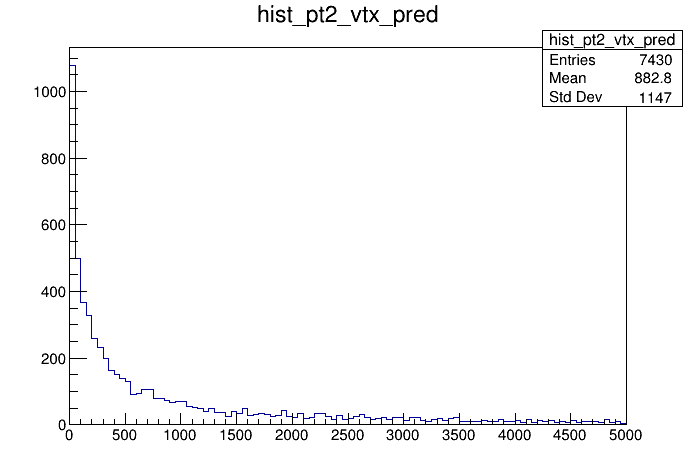

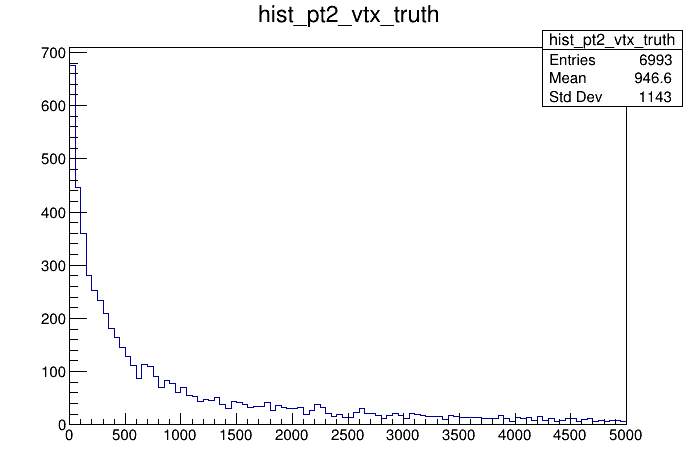

In [13]:
c6 = ROOT.TCanvas()
hist_pt2_vtx_pred.Draw()
c6.Draw()

c7 = ROOT.TCanvas()
hist_pt2_vtx_truth.Draw()
c7.Draw()